# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

Answer:
No, the smartcab is not moving in a Trial in simulation. 

The cab is standing at an intersection. There are three states of interest.

1. Cab is having a Red light. Cab gets a positive reward if it waits on red light. Since the cab is not moving, it is getting this reward all the time. 
2. Cab is having a Green light and there is not oncoming traffic. Cab is getting negative reward if the cab did not move in this condition. Since the cab is not moving, it is always getting a negative reward in this case.
3. Cab is having a Green light and there is oncoming traffic. Cab is getting a positive reward if the cab did not move. Cab is always getting reward since it is not moving.

Also rewards seem to be somewhat random and seem to fall within a range. Reward for stopping at red is less than penalty for not moving in Green light on average. Compared to others, the reward for not moving in "Green light with oncoming traffic" is smaller.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

Answer:
agent.py:
*********
num_dummies parameter to Environment class controls the number of cabs will be there in the street, in addition to the cab we are training. Set to 100 by default.

grid_size in Envorinment class control the size of the grid. Set to 8X6 by default.

learning can be set on LearningAgent class to control whether the "agent" should learn. Currently, this will not have any effect since it does not seem to be used anywhere.

update_delay to Simulator class controls how slow the simulation runs. By default it sleeps for 2 seconds b/w iterations.

enforce_deadline when set on the "agent" will add penalty for not reaching destination on time. Also the simulation is stopped after the deadline.

display when set to false will not show the GUI showing the simulation. Only the logs will be present.

tolerance is used as the threshold which is used to move from "training" state to "testing" state.
n_test is the nubmer of tests to run once it is moved to "testing" state.


environment.py:
***************
act()

In every step in a simulation, step() function in envirnonment is called, which inturn will call update on each agent. agent inturn will call env.act() once it has decided which action to take in case of DummyAgent. For LearningAgent, it call env.act() followed by learn()

simulatory.py:
**************
render_text() is used to display the "step details" to the console. render() will update the GUI. render_text() is always called. render() is called only if "display" is set to true.

planner.py:
***********
It tries the East-West direction first.  i.e. it will first tries to move closer to the "x" position and then move closer to the "y" position in the grid.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


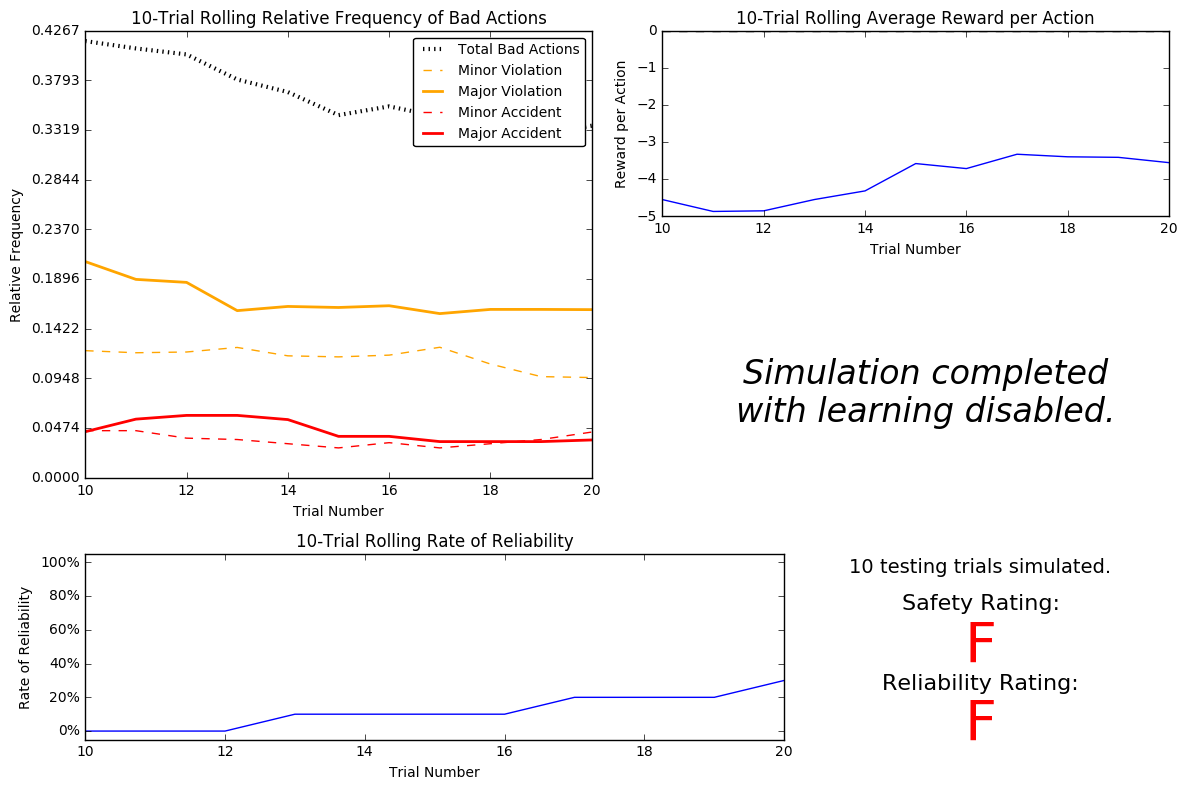

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

Answer:
Waypoint, light and oncoming are the most relevant features.

Waypoint is used for picking the shortest path (assuming Grid and uniform traffic). Also once we have waypoint, there is no use of deadline since we will be using the "best" possible path and we cannot do any better.

light is the most important feature for safety. We should not be moving when it is red. It is also importatn for efficiency since we should move if it is green.

oncoming is important for the case when we want to turn left (also in the case where cab want to go straight and the oncoming traffic can make mistake). While turning left in a green signal we have to make sure that there is not oncoming traffic.

But the above discussion was assuming that the other driver does not make any mistake, which is not true in practice. In this scenario we should consider both 'left' and 'right' features as well. For e.g. the cab want to go straight on Green and if the left or right traffic jumped the red light, we want to be defensive and stop eventhough the cab has the right of way. 

In short dealine is not required. left and right are required if we want to account for other driver mistakes. waypoint, light and oncoming are mandatory.

In this specific case it can be assumed that the other drivers does not make any mistake and we can do with just waypoint, light and oncoming.

<Resubmission1>
I still think that deadline is not required since the waypoint will give the shortest path. But suppose we considered deadline also as part of state, then the number of states will explode. With the current deadline of 100, the number of possible states will be multiplied by 100. This is assuming that it is integers. If fractions are allowed, then it will be infinite. Also as discuseed in Question9, including deadline would force the cab to take risky actions (like jumping a redlight) to meet the deadline and reaching the destination on time (which is not what we want).

Waypoint is used to give direction to the cab. It uses the destination location and the current location to decide where to go. 

About the shortest path, this will give you the shortest path. The shortest path length in the grid is |xdestination - xCurrent| + |ydestination - yCurrent|. The current implementation of waypoint will first take the streets and then take the avenue and it will take one of the shortest paths. 
<Resubmission1>
<Resubmission1>
I want not saying that left and right are required. I was saying that it is required in real life, but NOT required in this case since the DummyAgent will never make a mistake.

But going again through the "US right of law" defnition, it is allowed to make a right turn on Red if there is not oncoming traffic. This mean that I have to use 'left'. 'right' would have been required if there was a U-Turn option. Since there is no U-Turn option and the DummyAgent do not make a mistake, 'right' is not required.
</Resubmission1>

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

Answer:
Had picked waypoint, light and oncoming.

waypoint can have three states: left, right and forward (It can have None as well. But since it is the final state, not considering it as a state).

light can have two states: True, False

oncoming can have four states: left, right, forward and None.

Size of state space = 3 * 2 * 4 = 24 states.

Number of states is reasonable and should be able to learn with reasonable number of training trials.

<Resubmission1>
Added 'left' as well to take care of right turn on Red. Size of state space = 3 * 2 * 4 * 4 = 96
</Resubmission1>

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

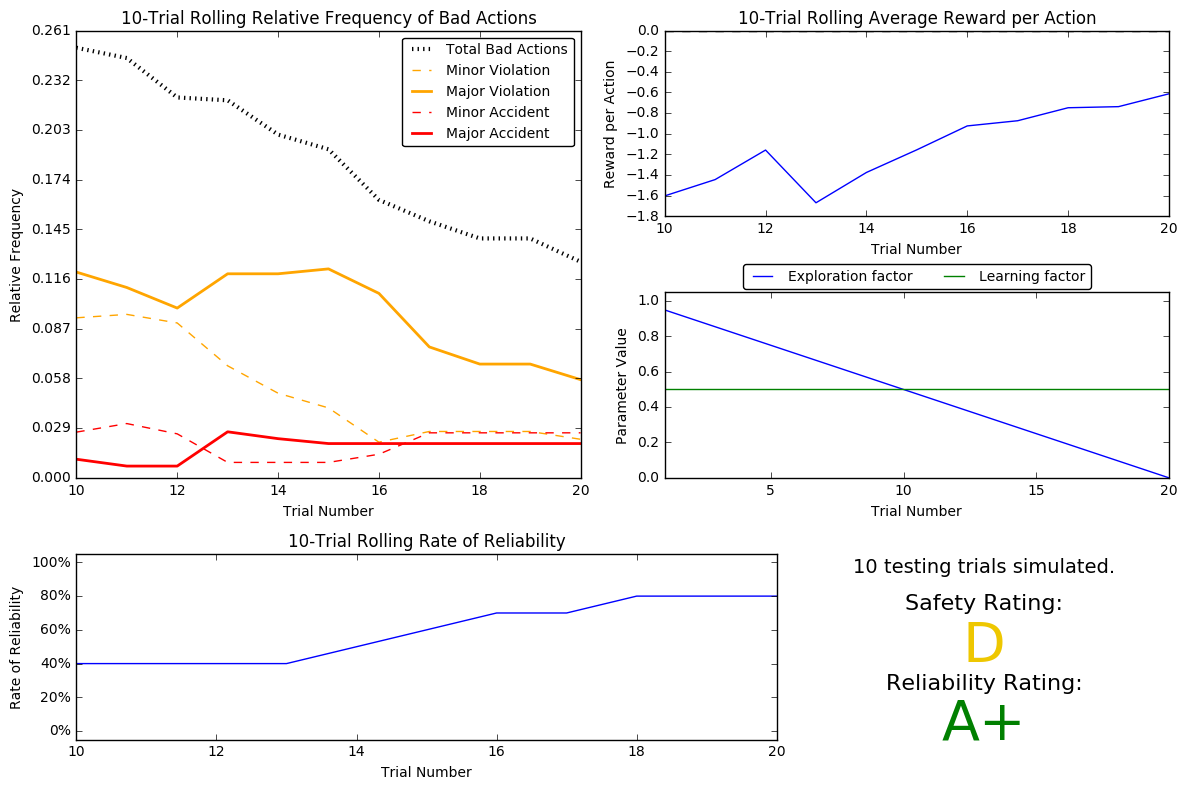

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

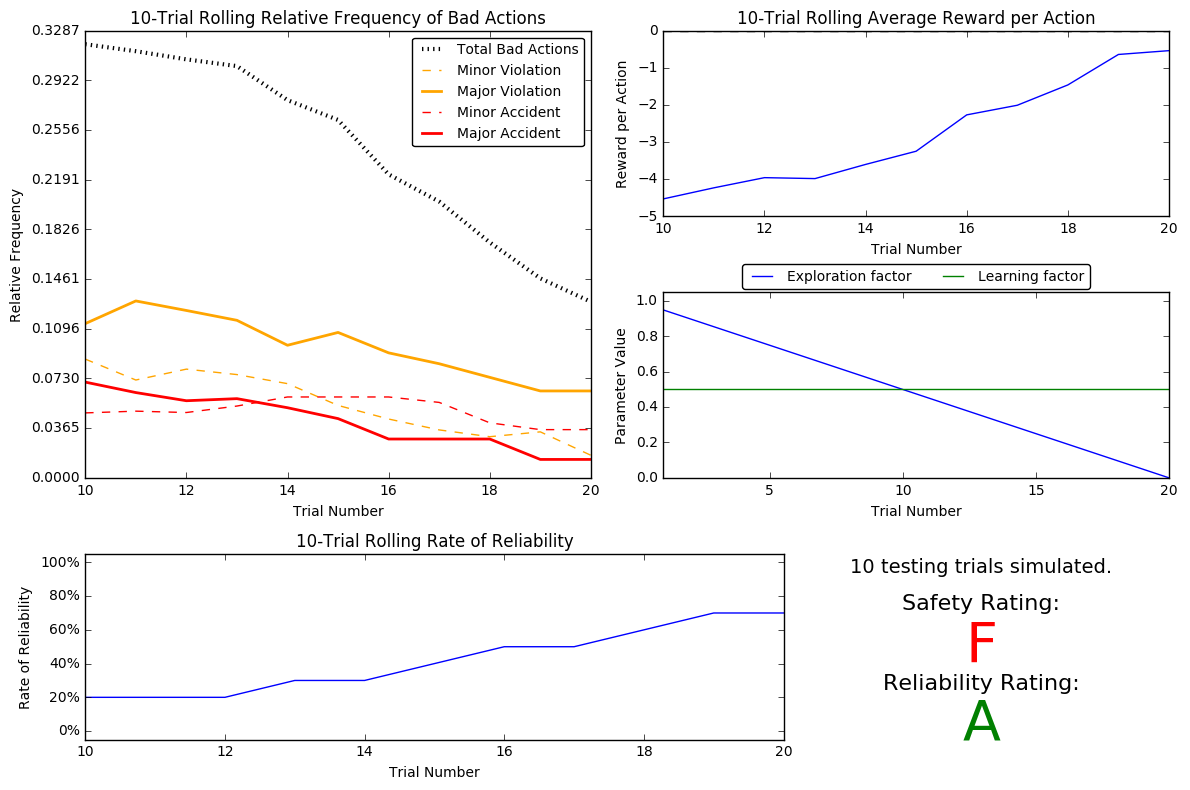

In [4]:
# Resubmission1
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

Answer:
Except Major Accident, everything else improves with the number of trials. Major accidents were flat and increases to about 3 percent and plateaued there. Except Major violation, everything else converged to about 2%. There seem to be more scope for improvement in Major violation. Again since this is rolling frequency the actual number of Major violations at trial 20 should be less than 05 (estimate around 2.5)

Reliability steadily increased from 40% to 80% and became flat.

Reward per action kept on increasing and reached about -0.7. It do not seem to have converged. If we had increased the number of trials, there seem to be more scope for improvement. Again since this is a rolling estimate the actual value at trial 20 should be better than -0.7 (estimate around zero)

Comparing with the basic driving agent, both seem to improve as the number of trials increase. But the number are much better for Q-learning. The graph is showing only after 10 trials. I guess during the initial trials, it would have looked much similar to basic driving agent. Also the rate of violations for different categories seem to be match (Major violations is the largest for e.g.)

Reliability show sign of plateauing around trial 18. From reliability standpoing 18 trials should have be enough. In the case of error, it look like there is still scope for improvement. I think it need more trials. There are still action with 0.0 Q-Value in the Q-table. This also points to the fact that it did not explore the entire problem space. For example, it did not learn None action for ('left', 'green', 'forward')

Decaying function started of as .95 and reaches 0 at trial 0.

As the number of trials increases, the number of bad actions decrease and the average reward increase. Some of them plateaued before others and some did not plateau.

Safety and Reliability went up drastically compared to the basic driving agent. Got A rating for reliability and the safety improved from F to D.

Investigated one of the "accidents" in the test run. For ('right', 'red', None)  action 'right' was chosen. I expected None action. On looking at the Q-Table found the following entry

('right', 'red', None)
 -- forward : -17.37
 -- right : 1.22
 -- None : 1.15
 -- left : -9.92


Here right is having better score than None. So it took right due to the score in Q-table (which I think is wrong).

Following is the Trial run which gave a positive score of Right action in ('right', 'red', None) state.

state: ('right', 'red', None)
Agent previous state: ('right', 'red', None)
Agent followed the waypoint right. (rewarded 1.13)
69% of time remaining to reach destination.

I think either there is a bug in my code or environment.py or I am missing something. I am also assuming that there is no "free right" in the simulation. I think this assumption is accurate since the "test" gave a penalty for this action. Log below.

state: ('right', 'red', None)
Agent previous state: ('right', 'red', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.36)
55% of time remaining to reach destination.

<Resubmission>
There are many state/actions for which the value is 0.0, meaning the learner did not encounter them. So it did not get enough trials to learn and do well in testing. Others are more or less similar to first submission.
</Resubmission>

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

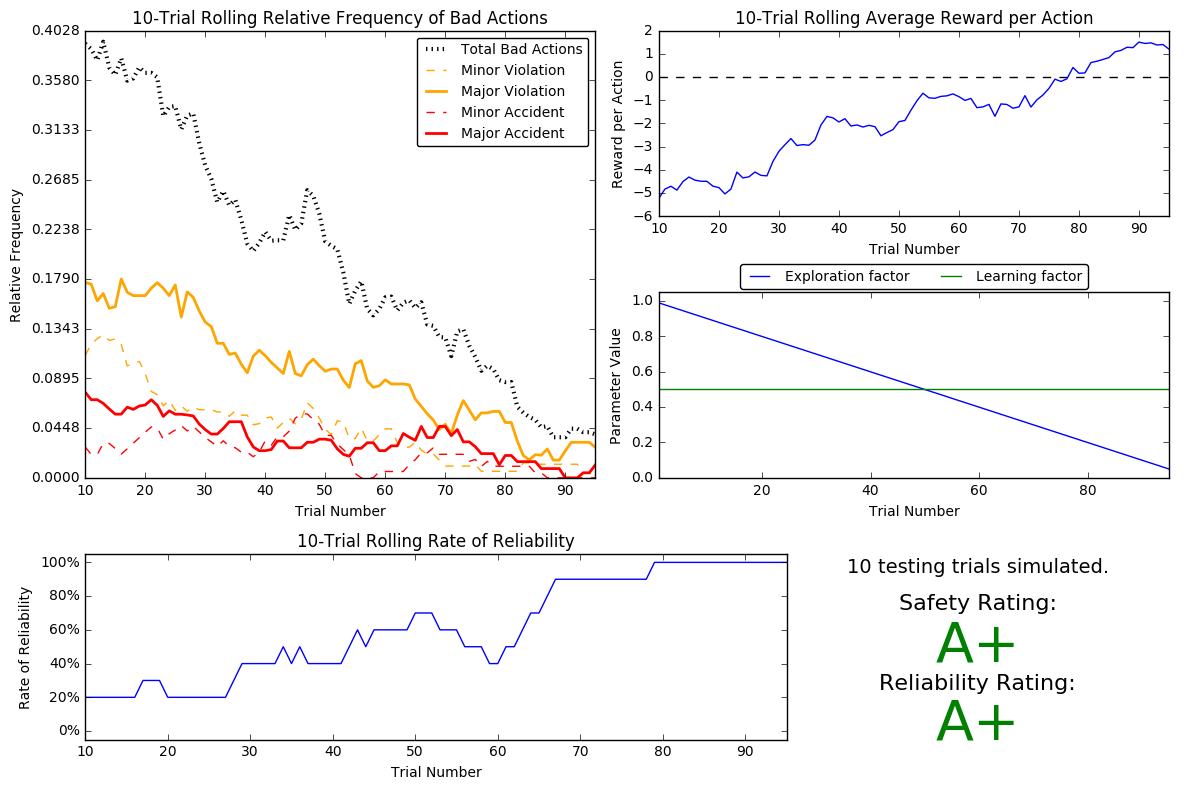

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# With linear with .01 decrements
vs.plot_trials('sim_improved-learning.csv')

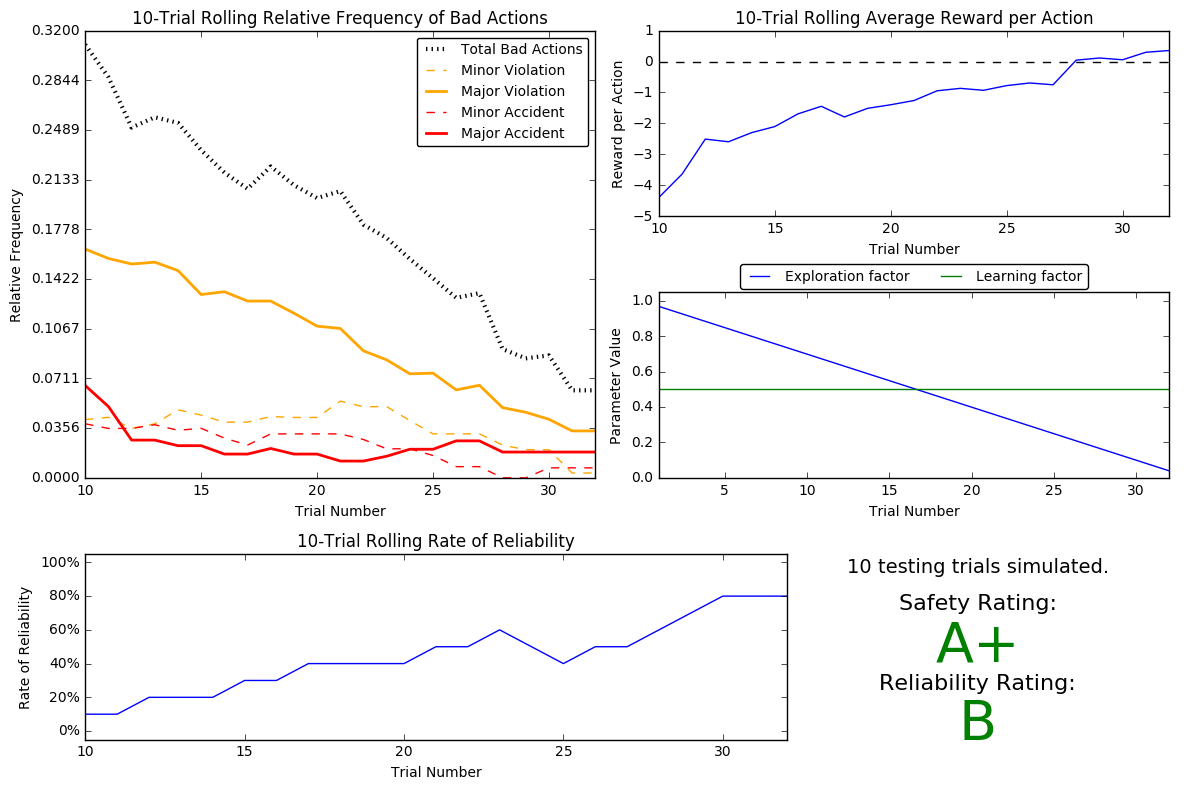

In [7]:
# With linear with .03 Decrements
vs.plot_trials('sim_improved-learning.csv')

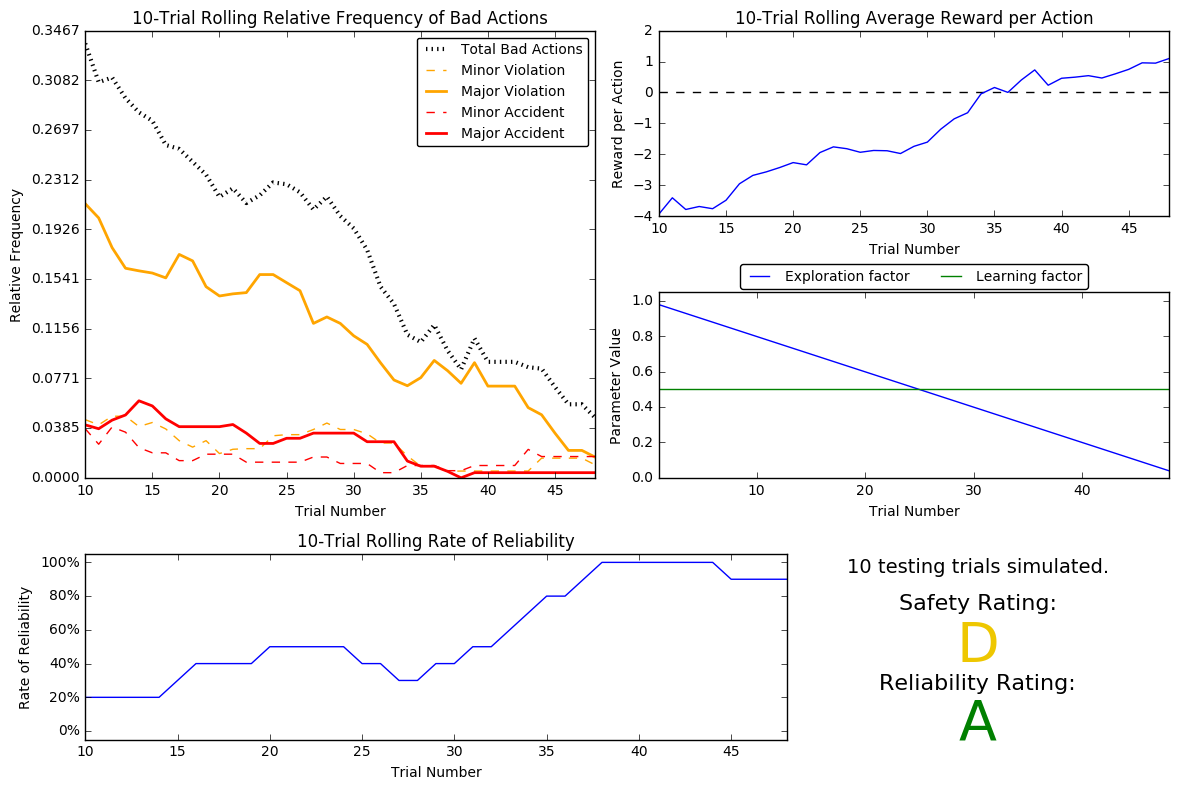

In [30]:
# With linear with .02 Decrements
vs.plot_trials('sim_improved-learning.csv')

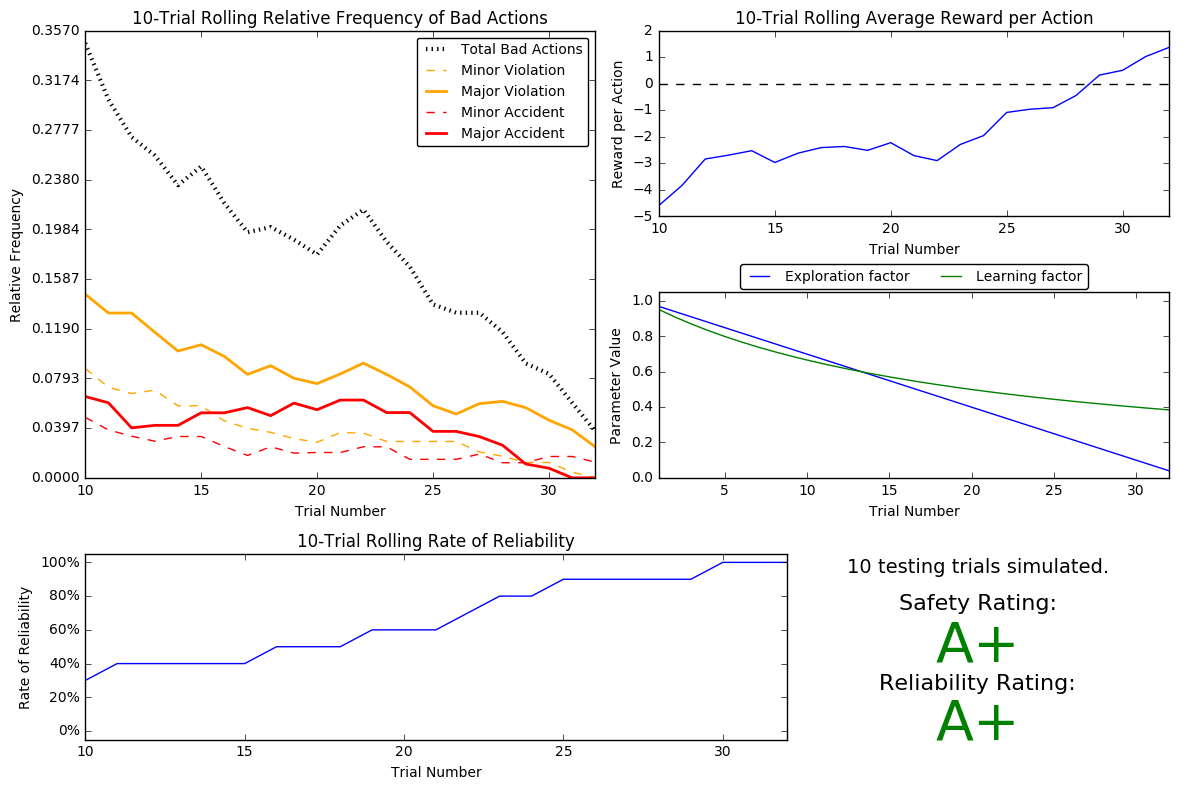

In [10]:
# With linear with .03 Decrements
# self.alpha = max(.25, (20.)/(20+self.t))
vs.plot_trials('sim_improved-learning.csv')

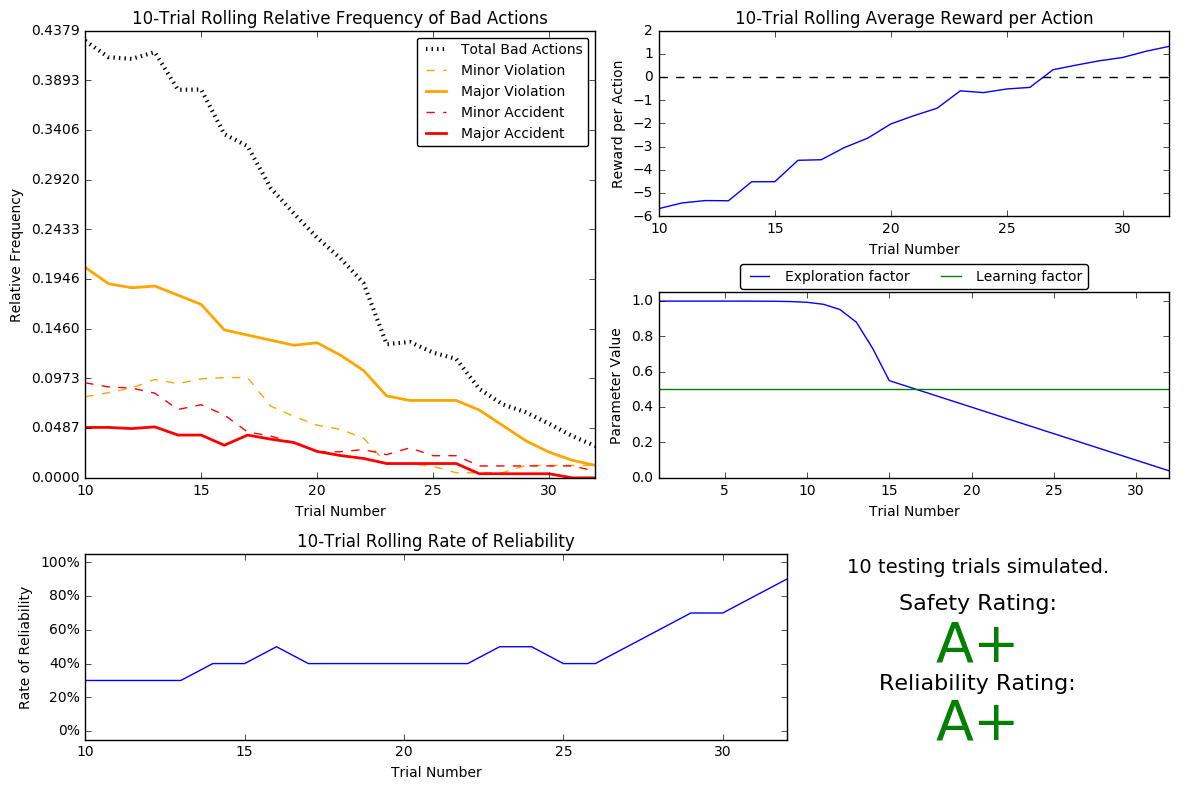

In [18]:
#self.epsilon = max((1. / (1 + math.exp(self.t-15))), 1 - 0.03*self.t)            
#self.alpha = 0.5
vs.plot_trials('sim_improved-learning.csv')

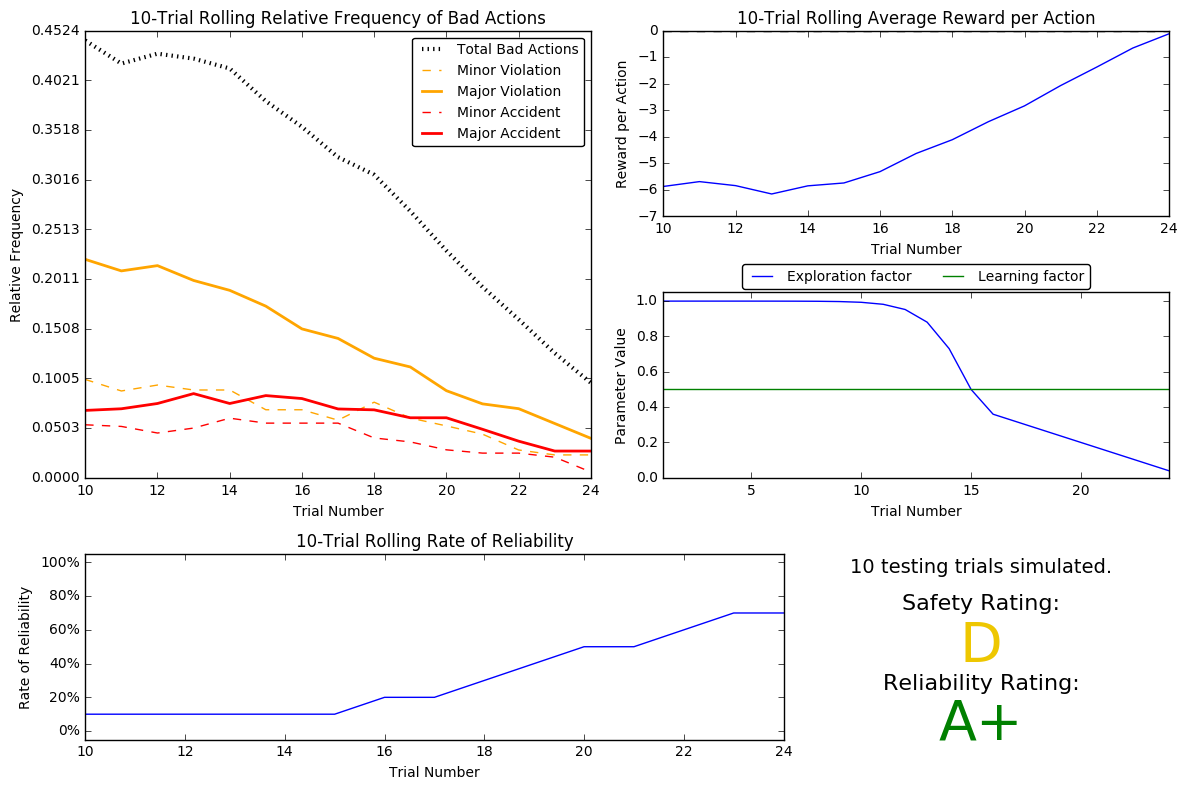

In [19]:
#self.epsilon = max((1. / (1 + math.exp(self.t-15))), 1 - 0.04*self.t)
vs.plot_trials('sim_improved-learning.csv')

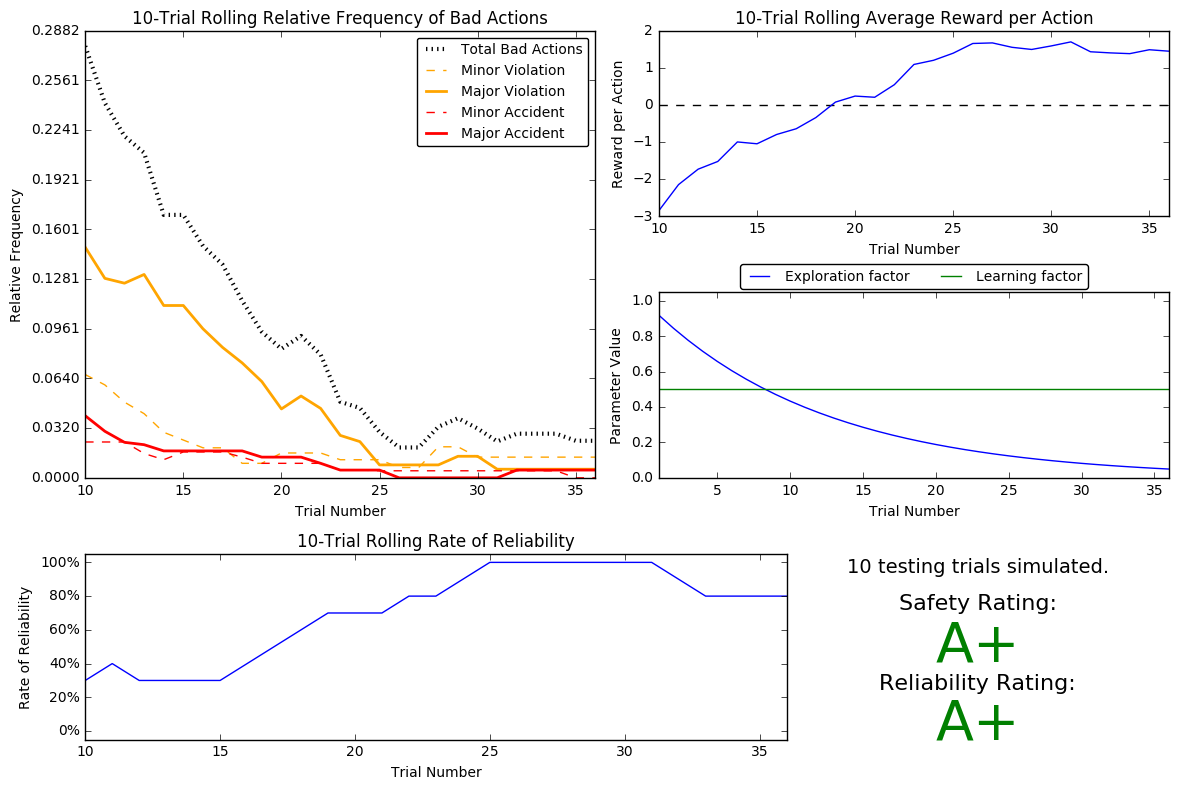

In [32]:
#self.epsilon = math.pow(.92, self.t)
vs.plot_trials('sim_improved-learning.csv')

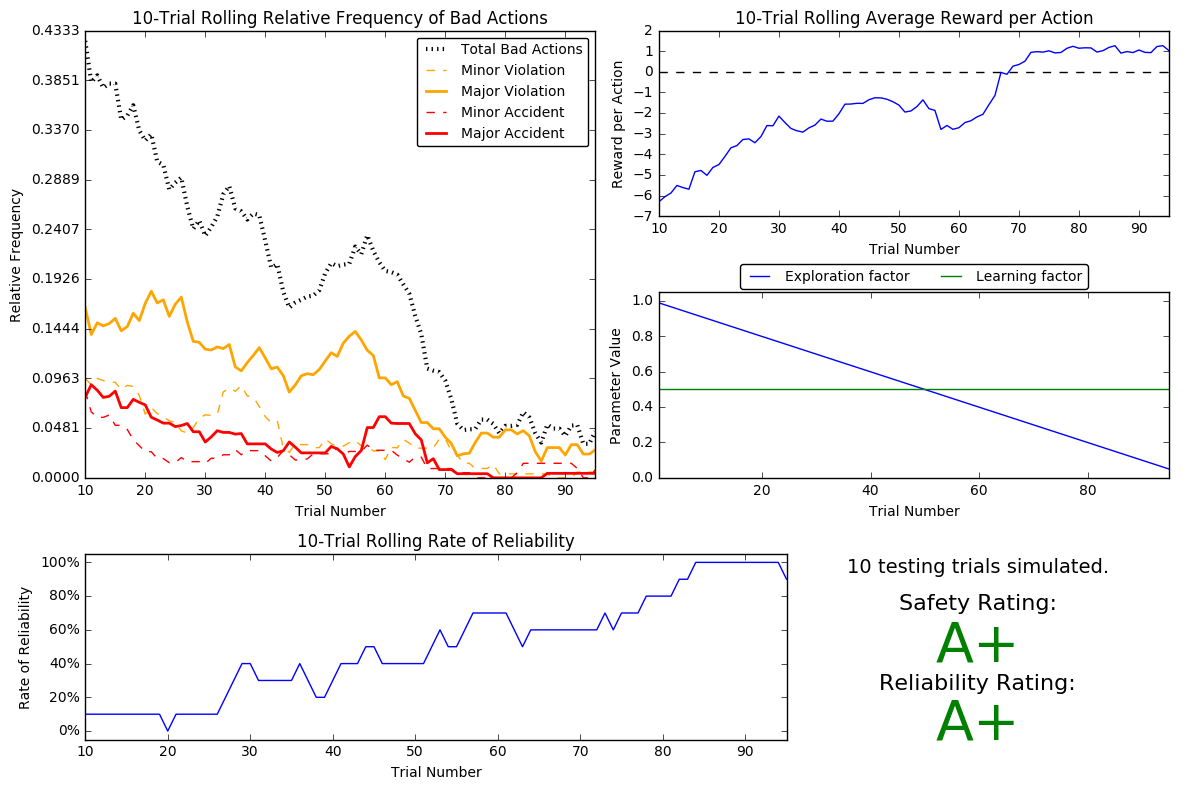

In [6]:
# With linear with .01 decrements
#Resubmission1
vs.plot_trials('sim_improved-learning.csv')

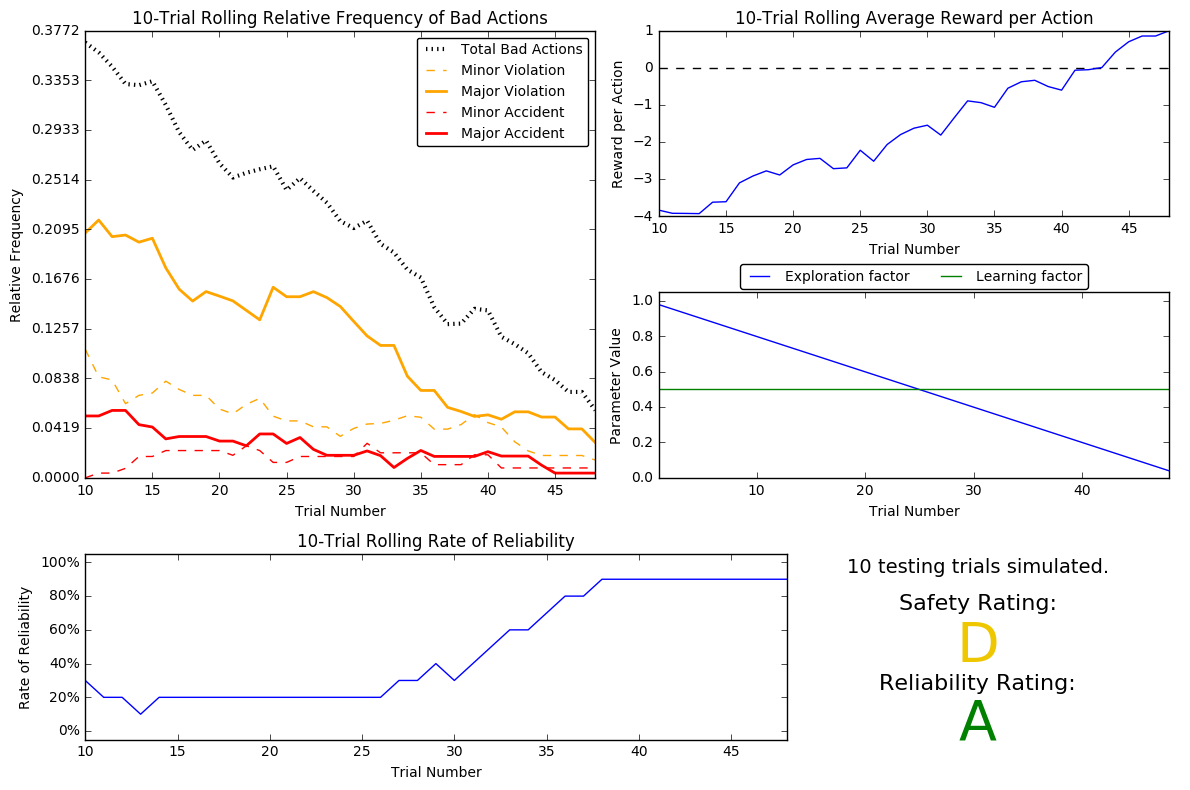

In [10]:
# With linear with .02 decrements
#Resubmission1
vs.plot_trials('sim_improved-learning.csv')

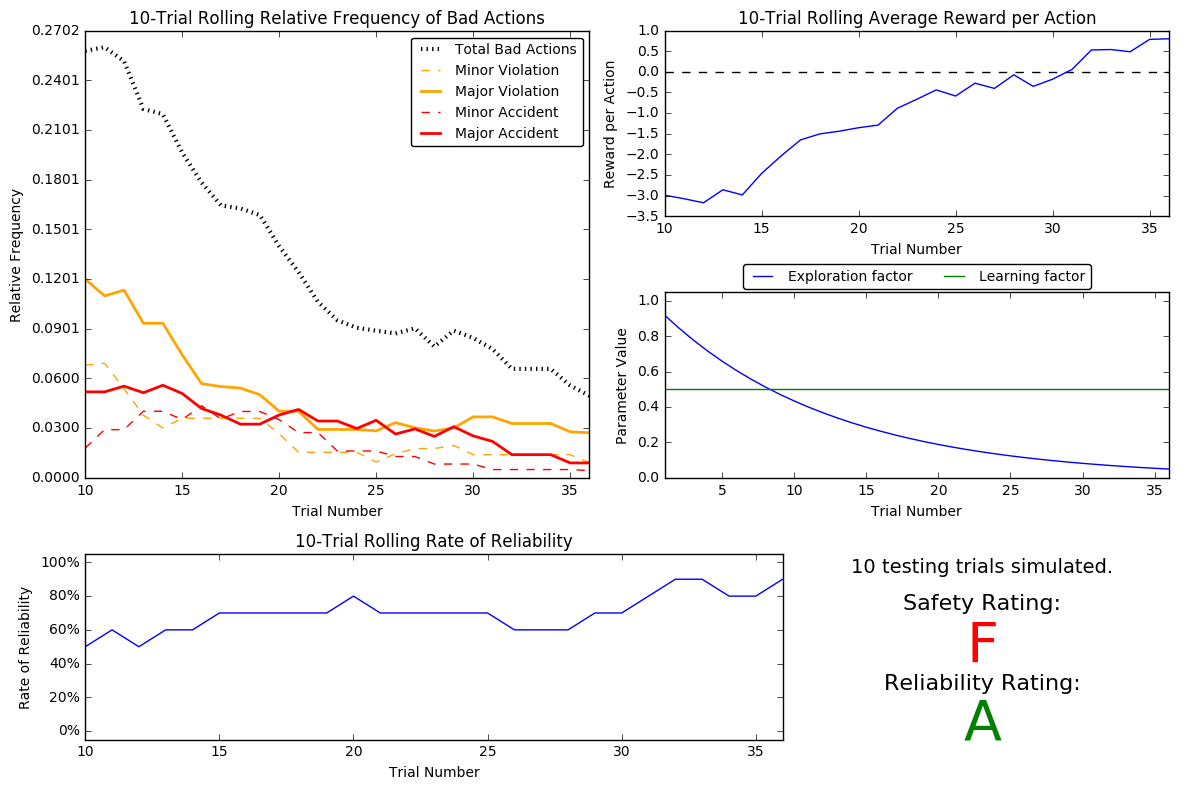

In [12]:
#Resubmission1
#self.epsilon = math.pow(.92, self.t)
vs.plot_trials('sim_improved-learning.csv')

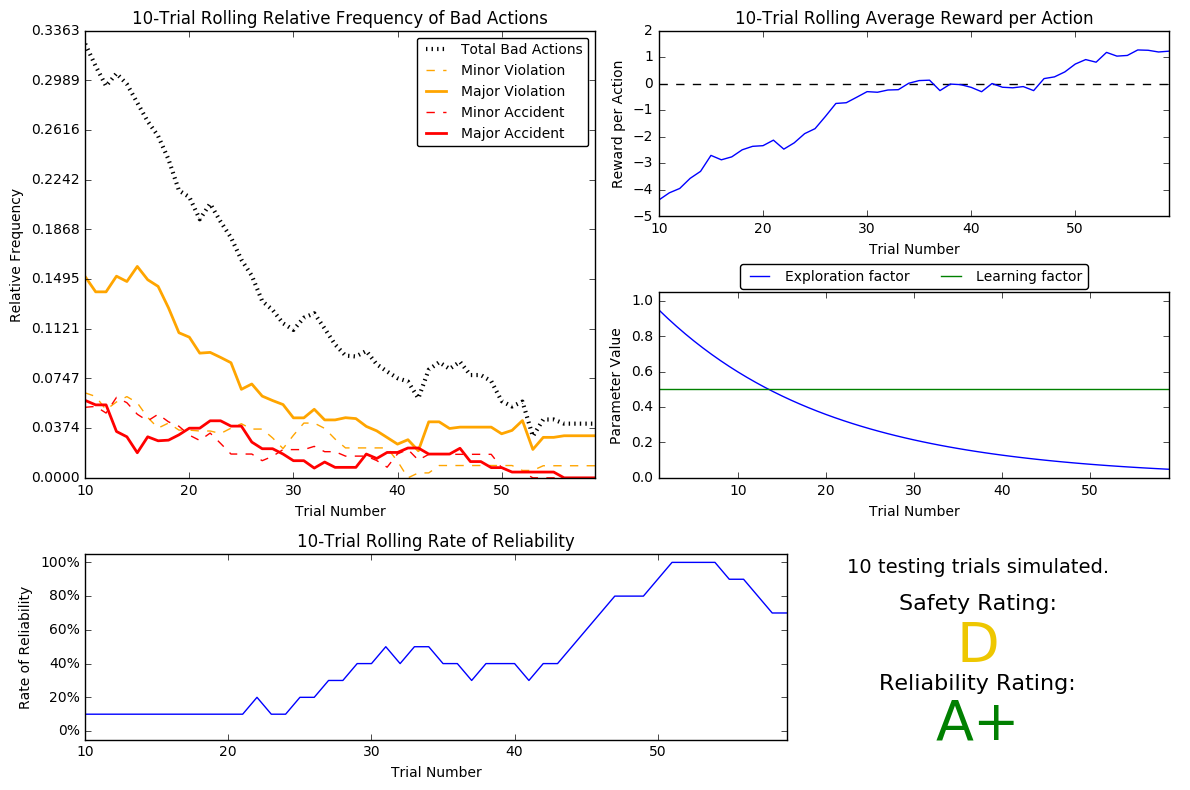

In [13]:
#Resubmission1
#self.epsilon = math.pow(.95, self.t)
vs.plot_trials('sim_improved-learning.csv')

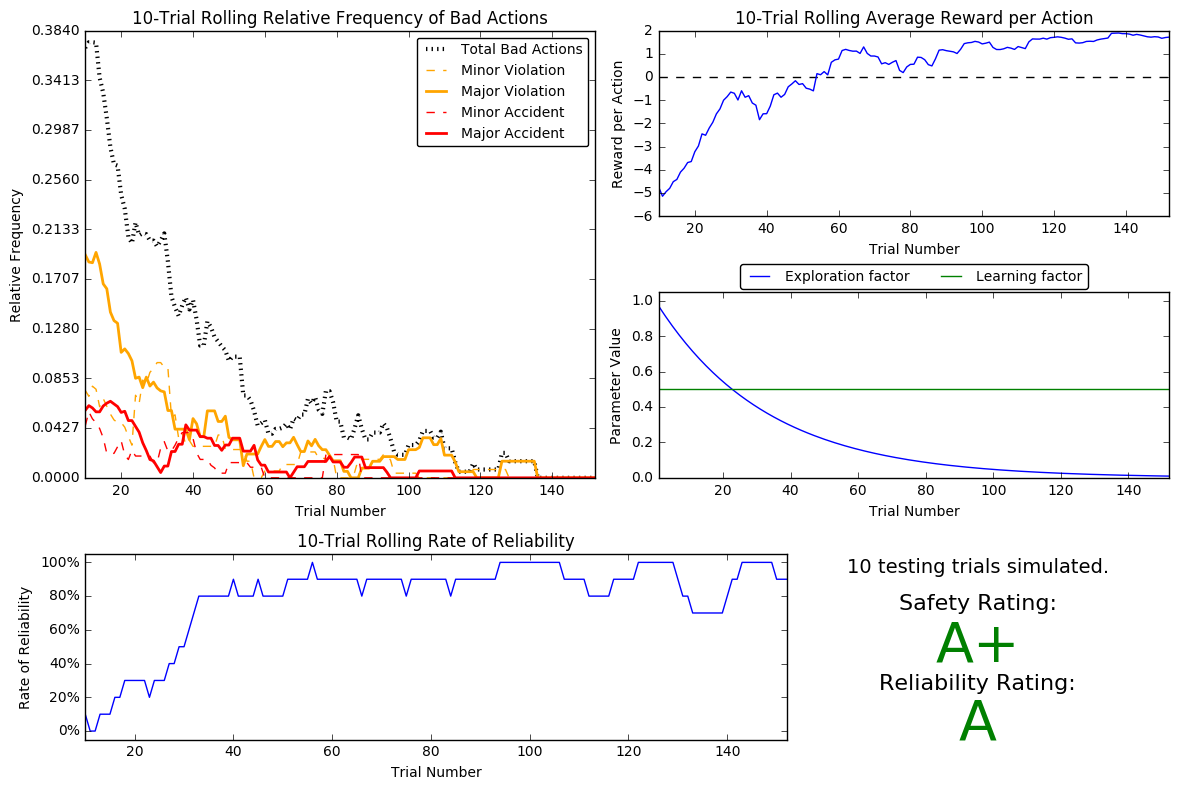

In [19]:
#Resubmission1
#self.epsilon = math.pow(.97, self.t)
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

Answer:
I tried out multiple epsilon functions like
    1. Linear decrement of .01 - Gave good results
    2. Linear decrement of .03 - Gave good results
    3. Linear decrement of .03 with self.alpha = max(.25, (20.)/(20+self.t)). Basically wanted a minimum learning of .25 and it decay with (20/(20+t)). This also gave good results.
    4. Combination of Negative Sigmoid and lineary. Basically wanted the model to do a lot of exploration in the beginning and later gradually dropping (decrementing lineary by .03), with alpha=.5. This also gave good results.
    5. Same as 4, but wanted to see if it could learning fasters. So used linear decrements of .04. But this did not do well.
    6. Tried with math.pow(.92, t). This also gave good results.

With the basic linear, I guess it required more than 50 trials (Because the one with 50 trials did not give good results.).

Did not change epsilon-tolerance. Tried out an alpha (20 / (20 + t)). Wanted it to learn faster earlier. Did not find that much benefit. It might be possible that if it learned something wrong, it might find it hard to correct itself. So went with the default alpha=0.5

Good improvement from the default learner in terms of Safety Score.

I think it learned a decent policy.

Eventhough the results show good score, there are still some states with 0.0. I guess the learner did not get time to see those states. Eventhough we got good numbers with trial numbers between 30-40, I think it still needed to be trained for longer time so that it gets a chance to. So I am not satisfied with what it had learned. But I do see that will more trials it would have "learned" those states as well.
 
 <Resubmission>
 With left also added, the default learner with .01 increments (100 trials) did a good job. So 100 trials was good to get a good test score. But more complex epsilon did not give too much benefit though.
 </Resubmission>

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

Answer:
The optimal policy for states:
    1. (waypoint=forward, light=red, oncoming=None) is None, since the cab should stop at the red light
    2. (waypoint=forward, light=green, oncoming=None) is forward, since the cab should move forward on green light
    2. (waypoint=forward, light=green, oncoming=forward) is forward, since the cab should move forward on green light even if the oncoming traffic is moving forward.
   
Following states has wrong policy. State tuple is (waypoint, light, oncoming)
    ('left', 'green', 'forward') should be None (since turning left towards oncoming is illegal), but learned forward 
     ('right', 'green', 'forward') Should be right but learned forward
     ('right', 'green', 'right') should be Right. but learned forward
     ('left', 'green', 'right') should be None. But learned forward
     ('right', 'red', 'forward') should be None. But learned right
     ('forward', 'red', 'forward') should be None and learned None
     ('right', 'red', 'right') should be None but learned right
     ('right', 'green', 'left') should be right but learned left
 
 Following states has correct policy: 
     ('forward', 'green', 'left') should be forward and learned forward
    ('forward', 'green', None) should be forward and learned forward
     ('forward', 'red', 'right') should be None and learned None
     ('left', 'red', 'left') should be None and learned None
     ('right', 'red', 'left') should be None and learned None
     ('left', 'red', None) should be None and learned None 
     ('right', 'red', None) should be None and learned None
     ('left', 'red', 'right') should be None and learned None 
     ('forward', 'red', None) should be None and learned None
     ('forward', 'green', 'forward') should be forward and learned forward
     ('forward', 'red', 'left') should be None and learned None
     ('forward', 'green', 'right') should be forward and learned forward
     ('left', 'red', 'forward') should be None and learned None
     ('left', 'green', None) should be left and learned left
     ('right', 'green', None) should be right and learned right
     ('left', 'green', 'left') should be left and learned left
 
None is the correct policy for the following state since the cab should be stopped on Red signal. It correctly learned the policy since the weight for 'None' action has the highest score.
    ('left', 'red', 'forward')
     -- forward : -12.74
     -- right : 0.39
     -- None : 1.74
     -- left : 0.00


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

Answer:
Gamma is used so that we give more weightage to earlier rewards. It is also used as a tool to make the algorithm converge. i.e. as the time goes on the weightage become close to zere and ultimately does not matter. Having a very agressive gamma would make the agent make risky decisions (like jumping a red light) to meet the deadline. We want to be safe first and then optimize on timely arrival. Since the current problem is using a Grid, the path it chooses using waypoint will be the shortest path. So the "safe" action which we are going to take is not going to change even if we give more weightage to most recent rewards. Also in the case of cab, it is not the case that most recent reward is more valuable than later reward.

Also we are using tolerance as the signal to terminate. So we do not have to look at the other ways to terminate the learning.

<Resubmission1>
In driving the signals needed to make the right decision at a traffic signal does not depend on anything in the future. The decision is based on the current state of the traffic light, where the cab want to go, the condition of traffic and the rule of law. i.e. a future right decision (reward) or a future violation (penalty) does not have any influence on the "right" decision the cab need to take at present. Hence we should not incorporate the score for future states to current state.

Also T is not deterministic across trials. For e.g. if the cab transition from state s1 to s2, the waypoint component will vary depending on where the cab is located and the destination. So the T will vary depending on the training data.

Also since there can be loops, it is possible (if gamma is greater than 1 or close to one) that the scores of states in loop keep in increasing in each iteration. After some threshold, it might get more weightage than the penalty and can cause the model to make wrong decisions for other states. Loop can be self loop as well. 
</Resubmission1>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.